# Elisabeth Webb CA03 - Decision Tree Algorithm 


# 1. Data Source and Contents

In [25]:
!pip install ipython.autotime

%load_ext autotime 

  Created wheel for ipython.autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=8b1ae964a073d5296555655e2c31abbeb1b2733cf208d8f1b9234618bc5fb201
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython.autotime


In [29]:
#libraries to import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from sklearn.tree.export import export_text
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

time: 10.9 ms


In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/ArinB/MSBA-CA-03-Decision-Trees/master/census_data.csv')
data.count()
data.shape
data.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

time: 507 ms


# 2. Data Quality Analysis (DQA)

In [31]:
#Perform necessary data cleansing and transformation based on your observations from the data quality analysis
#split data to get rid of abdce
data['capital_gl_bin'] = data['capital_gl_bin'].str.split('.', expand=True)[1]
print(data['capital_gl_bin'])
for column in data.drop(columns = ['flag','y','capital_gl_bin']):
  data[column] = data[column].str.split('. ', expand=True)[1]

0         > 0
1         = 0
2         = 0
3         = 0
4         = 0
         ... 
48837     = 0
48838     = 0
48839     = 0
48840     > 0
48841     = 0
Name: capital_gl_bin, Length: 48842, dtype: object
time: 1.45 s


In [32]:
data.head()

hours_per_week_bin occupation_bin msr_bin  ... age_bin   flag  y
0              31-40             Mi     Mid  ...    36-4  train  0
1               0-30           High    High  ...   40-55  train  0
2              31-40            Low     Mid  ...    36-4  train  0
3              31-40            Low    High  ...   40-55  train  0
4              31-40           High    High  ...    26-3  train  0

[5 rows x 11 columns]

time: 36.1 ms


In [33]:
#Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.
data.isnull().sum() #there is no missing values 
data.info() #NaN values in the dataset 
#Display descriptive statistics of each column
data.describe(include=['O']) #describes the categorical variables
data['y'].describe() #describes the numerical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
hours_per_week_bin    48842 non-null object
occupation_bin        48842 non-null object
msr_bin               48842 non-null object
capital_gl_bin        48842 non-null object
race_sex_bin          48842 non-null object
education_num_bin     48842 non-null object
education_bin         48842 non-null object
workclass_bin         48842 non-null object
age_bin               48842 non-null object
flag                  48842 non-null object
y                     48842 non-null int64
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

time: 207 ms


# 3. Exploratory Data Analysis (EDA)

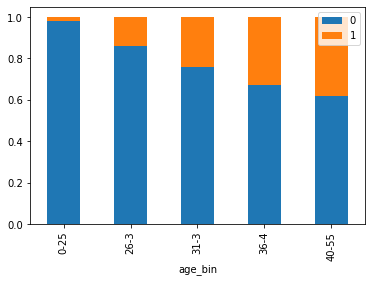

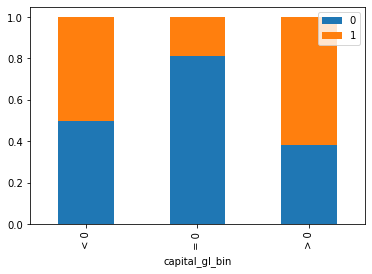

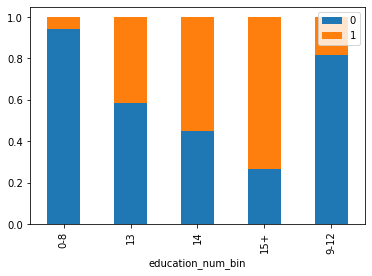

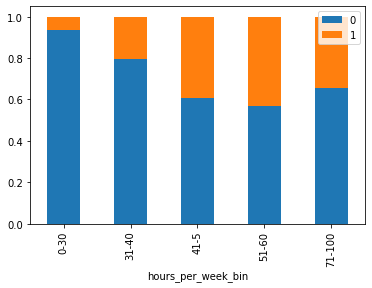

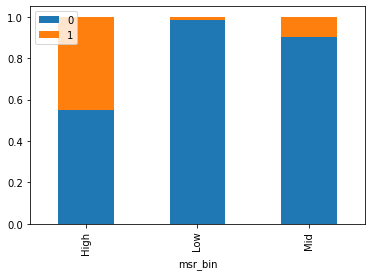

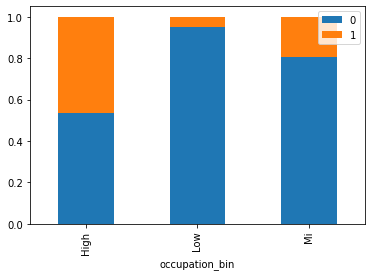

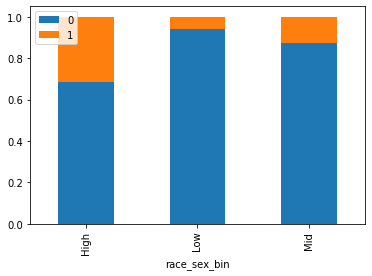

time: 1.39 s


In [34]:
#create stacked bar charts 
#use pd.crosstab() to show the frequency of each bin
#use normalize='index' to divide all the values by the sum of the total values.
#normalize='index' will divide the row by the total frequency 

pd.crosstab(data['age_bin'], data['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

pd.crosstab(data['capital_gl_bin'], data['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

pd.crosstab(data['education_num_bin'], data['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

pd.crosstab(data['hours_per_week_bin'], data['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

pd.crosstab(data['msr_bin'], data['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

pd.crosstab(data['occupation_bin'], data['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

pd.crosstab(data['race_sex_bin'], data['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

# 4. Build Decision Tree Classifier Models

In [35]:
#split the data into train and test 
train_data = data[data['flag'] == 'train'] 

test_data= data[data['flag']== 'test'] 

#sklean DecisionTreeClassifier() doesn't support categorical variables 
#therefore, we need to create dummy variables for each of the categorical variables

#categorical variables to convert to dummies
cat_feats = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']

#create dummies for the the training data
y_train = train_data['y']

x_train = train_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

#create dummies for the test data 
y_test = test_data['y']

x_test = test_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)

time: 104 ms


In [36]:
#next use the DecisionTreeClassifier()
#First without any hyperparameters 
dtree = tree.DecisionTreeClassifier(random_state = 100)
dtree = dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
y_prob=dtree.predict_proba(x_test)

time: 73.5 ms


# 5. Visualize Your Decision Tree using GraphViz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.290117 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.290117 to fit



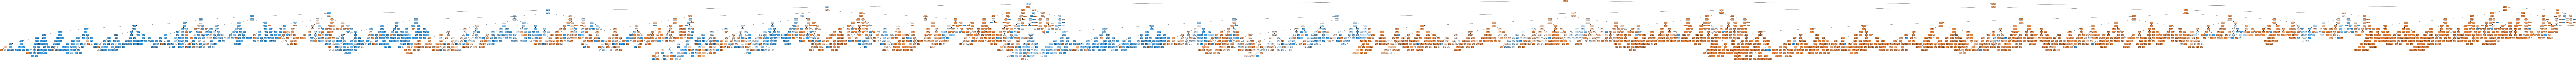

time: 44.8 s


In [37]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('census.png')
Image(graph.create_png())

# 6. Evaluate Decision Tree Preformance

[[11586   849]
 [ 1760  2086]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.54      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Accuracy: 0.84
Precision: 0.71
Recall: 0.54
F1 Score: 0.62
AUC Value: 0.74


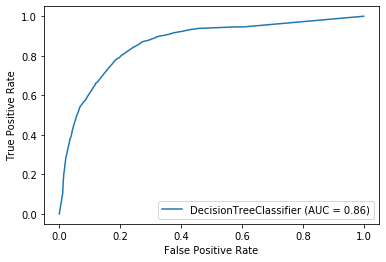

time: 271 ms


In [38]:
#confusion matrix (TP, TN, FP, FN... etc.)
cm=confusion_matrix(y_test, y_pred)
print(cm)

#Accuracy, Precision, Recall, F1 Score, AUC Value, ROC Curve (graph)

#Classification Report 
cr=classification_report(y_test,y_pred)
print(cr)

#Accuracy Score
acc= metrics.accuracy_score(y_test, y_pred)
print('Accuracy:',round(acc, 2))

#Precision, Recall, and F1 Score
precision= precision_score(y_test, y_pred)
print('Precision:', round(precision, 2))

recall=recall_score(y_test, y_pred)
print('Recall:', round(recall, 2))

f1=f1_score(y_test, y_pred)
print('F1 Score:', round(f1, 2))

#AUC Value 
auc=roc_auc_score(y_test, y_pred)
print('AUC Value:', round(auc, 2))

#ROC Curve Graph
plot_roc_curve(dtree, x_test, y_test)


# 7. Tune Decision Tree Preformance

In [39]:
#Varying Hyperparameters of split criterion, minimum sample split, minimum sample leaf, and maximum depth
#split criteria= 'entropy' or 'gini
#split value 1 = 5, and split value 2 = 10
#leaf value 1= 15, and leaf value 2= 10
#depth value 1 = 10,and depth value 2= 15
#manually enter values according to table on 'Tree Tuning Cases Elisabeth Webb' csv file
dtree1 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=15, max_depth=10)
dtree1 = dtree1.fit(x_train, y_train)
y_pred1=dtree1.predict(x_test)

cr1=classification_report(y_test,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.72      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281

time: 89.8 ms


# 8. Conclusion (Best Tree)

In [41]:
#Best Tree
#Through altering the parameters from the table in 'Tree Tuning Cases Elisabeth Webb' and experimenting with values, 
#I found the tree that gives the best metrics (highest accuracy, recall, precision, and f1 score)
dtree_best = tree.DecisionTreeClassifier(random_state = 100, criterion='gini', min_samples_split=5,min_samples_leaf=15, max_depth=15)
dtree_best = dtree_best.fit(x_train, y_train)
y_pred_best=dtree_best.predict(x_test)

cr_best=classification_report(y_test,y_pred_best)
print(cr_best)

#This tree has the highest f1 score of 0.63 which is a measure of the balance between precision and recall
#It also has the highest precision of 0.72 and recall of 0.56 compared to the other trees
#This tree has the highest accuracy score of 0.84 (many of the trees had the same accuracy score)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.56      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281

time: 97.8 ms


In [0]:
#draw the best tree using GraphViz
dot_data = StringIO()
export_graphviz(dtree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('census_best.png')
Image(graph.create_png())

# 9. Automation of Preformance Tuning 

In [14]:
#Automating the process of preformance tuning using lists
criteria = ['entropy','gini']
min_samples_split = [5,5,5,10]
min_samples_leaf = [15, 15, 10, 15]
max_depth = [10, 5, 10, 10]

for item in range(len(criteria)):
  for value in range(4):
    dtree_new = tree.DecisionTreeClassifier(random_state = 100, criterion=criteria[item], min_samples_split=min_samples_split[value], min_samples_leaf= min_samples_leaf[value], max_depth=max_depth[value])
    dtree_new = dtree_new.fit(x_train, y_train)
    y_pred_new=dtree_new.predict(x_test)
    cr_new=classification_report(y_test,y_pred_new)
    print(cr_new)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.72      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.53      0.60      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.73      0.75     16281
weighted avg       0.83      0.84      0.83     16281

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.72      0.54      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281

              preci

In [15]:
#Read in the hyperparameter variation table created in excel 
#we will use the values in each column for the hyperparemeters to test which combination's metrics (accuracy, precision, recall, and f1 score)
automation=pd.read_csv('automation_hypar.csv')
automation.head()

Split_Criteria  Minimum_Sample_Split  ...  Precision  F1_Score
0        entropy                     5  ...        NaN       NaN
1        entropy                     5  ...        NaN       NaN
2        entropy                     5  ...        NaN       NaN
3        entropy                    10  ...        NaN       NaN
4           gini                     5  ...        NaN       NaN

[5 rows x 8 columns]

In [16]:
#iterate through dataframe
for item in automation.index:
  print(automation.loc[item, 'Split_Criteria'])

entropy
entropy
entropy
entropy
gini
gini
gini
gini


In [19]:
#Automating Decision Tree Tuning using a dataframe
for item in automation.index:
  model = tree.DecisionTreeClassifier(random_state=100, criterion=automation.loc[item, 'Split_Criteria'], min_samples_split=automation.loc[item, 'Minimum_Sample_Split'], min_samples_leaf=automation.loc[item, 'Minimum_Sample_Leaf'], max_depth=automation.loc[item, 'Maximum_Depth'])
  model = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  automation.loc[item, 'Accuracy'] = round(np.mean(y_test == y_pred), 2)
  automation.loc[item, 'Recall'] = round(recall_score(y_test, y_pred), 2)
  automation.loc[item, 'Precision'] = round(precision_score(y_test, y_pred), 2)
  automation.loc[item, 'F1_Score'] = round(f1_score(y_test, y_pred), 2)
automation.head(8)
#best trees are those in row number 1 and 5 of the dataframe, because they have the highest F1 Score and metrics
#the hyperparameters are where criterion = 'entropy' or 'gini', min_samples_split = 5, min_samples_leaf = 15, and max_depth = 15

Split_Criteria  Minimum_Sample_Split  ...  Precision  F1_Score
0        entropy                     5  ...       0.72      0.62
1        entropy                     5  ...       0.72      0.63
2        entropy                     5  ...       0.72      0.62
3        entropy                    10  ...       0.72      0.62
4           gini                     5  ...       0.72      0.62
5           gini                     5  ...       0.72      0.63
6           gini                     5  ...       0.72      0.63
7           gini                    10  ...       0.72      0.62

[8 rows x 8 columns]

# 10. Prediction using your "trained" Decision Tree Model 

In [24]:
#create a new dataframe using the values given
#new_df =pd.DataFrame({'hours_per_week_bin' : '41-50 & 61-70' , 
#                       'occupation_bin' : 'Mid - Low', 'msr_bin': 'High',
#                       'capital_gl_bin':'> 0' , 'race_sex_bin':'Mid',
#                       'education_num_bin':'9-12','education_bin': 'High', 
#                       'workclass_bin':'Income','age_bin':'36-40 & 56-60', 'flag':'test'}, index=[0])
#print(new_df) #the new dataframe only has one row of data 

individual=pd.read_csv('new_individual.csv')
#print(individual)
#combine with original dataset
data_combined = data.append(individual, ignore_index=True, sort = False)
data_combined.tail(10)

#convert into dummy variables

#first split the data into train and test 
train_data = data_combined[data_combined['flag'] == 'train'] 
test_data= data_combined[data_combined['flag']== 'test'] 

#categorical variables to convert to dummies
cat_feats = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']

#create dummies for the the training data
y_train = train_data['y']

x_train = train_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

#create dummies for the test data 
y_test = test_data['y']

x_test = test_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)
 

x_test.drop(['age_bin_36-40 & 56-60',
'capital_gl_bin_ > 0',
'hours_per_week_bin_41-50 & 61-70',
'occupation_bin_Mid - Low'], axis = 1, inplace = True)

#dataframe with only dummies for new individual 
#df_dummies = pd.DataFrame(x_test.loc[48842])
#df_tr = df_dummies.transpose()
#print(df_tr)

#predict new individual's income category 
model_best = tree.DecisionTreeClassifier(random_state=100, criterion='gini', min_samples_split=5, min_samples_leaf=15, max_depth=15)
model_best = model_best.fit(x_train, y_train)
y_pred=model_best.predict(x_test)
print(y_pred)
y_prob=model_best.predict_proba(x_test)
print(y_prob)
#The model is predicting that the y value of the new individual (last row) will be 1
#Probabilities for the y variable being 0,1
#The results show that the probability of the value of y belongs to the 0 class is a 0.066, and 
#the probability that the value of y belongs to the 1 class is 0.933

[0. 0. 0. ... 0. 1. 1.]
[[1.         0.        ]
 [0.60855263 0.39144737]
 [0.80058651 0.19941349]
 ...
 [0.66666667 0.33333333]
 [0.26666667 0.73333333]
 [0.06666667 0.93333333]]
